##### Import Packages and Modules

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

##### Import Data

In [5]:
## DATA
df = pd.read_csv(r"C:\Users\14has\Downloads\AlexTheAnalyst\Python\Dataset\movies.csv")

##### Data Cleaning

In [6]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [9]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
df.shape

(7668, 15)

In [11]:
## Let's create a new data frame without the null columns 

df_clean = df.copy().dropna(axis = 0)

In [12]:
df_clean.shape

(5421, 15)

In [13]:
## Lets change the data type of Gross and Budget, from Float to int64

df_clean['gross'] = df_clean['gross'].astype('Int64')
df_clean['budget'] = df_clean['budget'].astype('Int64')

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   Int64  
 12  gross     5421 non-null   Int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 688.2+ KB


##### Some of the year column and released column don't match and released column seems to have the accurate date

- We are going to create a new column named year_corrected with a string data type.
- Then extract only the year from the released column.
- Store the extracted year in a newly created column called year_corrected.

In [15]:
df_clean.sample()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3704,Next Friday,R,Comedy,2000,"January 12, 2000 (United States)",6.2,38000.0,Steve Carr,Ice Cube,Ice Cube,United States,11000000,59827328,New Line Cinema,98.0


In [16]:
df_clean['released'].dtype

dtype('O')

In [17]:
# Extract the year using a regular expression
df_clean['year_corrected'] = df_clean['released'].astype(str).str.extract(r'(\d{4})')

Or you can directly extract without converting when the dtype is str or object
 - df_alex['year_corrected'] = df_alex['released'].str.extract(r'(\d{4})')

In [18]:
df_clean.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
2021,Run,R,Action,1991,"February 1, 1991 (United States)",6.2,2600.0,Geoff Burrowes,Dennis Shryack,Patrick Dempsey,United States,16000000,4409328,Hollywood Pictures,91.0,1991
5960,Johnny English Reborn,PG,Action,2011,"October 21, 2011 (United States)",6.3,123000.0,Oliver Parker,Hamish McColl,Rowan Atkinson,United Kingdom,45000000,160078586,Universal Pictures,101.0,2011
2681,Tank Girl,R,Action,1995,"March 31, 1995 (United States)",5.4,31000.0,Rachel Talalay,Alan Martin,Lori Petty,United States,25000000,4064495,Image Comics,104.0,1995
6499,The Other Woman,PG-13,Comedy,2014,"April 25, 2014 (United States)",6.0,133000.0,Nick Cassavetes,Melissa K. Stack,Cameron Diaz,United States,40000000,196710396,Twentieth Century Fox,109.0,2014
7085,Fifty Shades Darker,R,Drama,2017,"February 10, 2017 (United States)",4.6,95000.0,James Foley,Niall Leonard,Dakota Johnson,United States,55000000,381545846,Universal Pictures,118.0,2017


In [43]:
df_clean.sort_values(by = ['gross'], ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


##### Check for Duplicates

In [20]:
df_clean[df_clean.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected


In [21]:
# Display the rows that are duplicates
duplicates = df_clean[df_clean.duplicated()]
print(duplicates)  # This will show the duplicate rows


Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, year_corrected]
Index: []


#### Movie Correlations

In [22]:
## Lets compare the correlations of Budget Spent and Gross Revenue

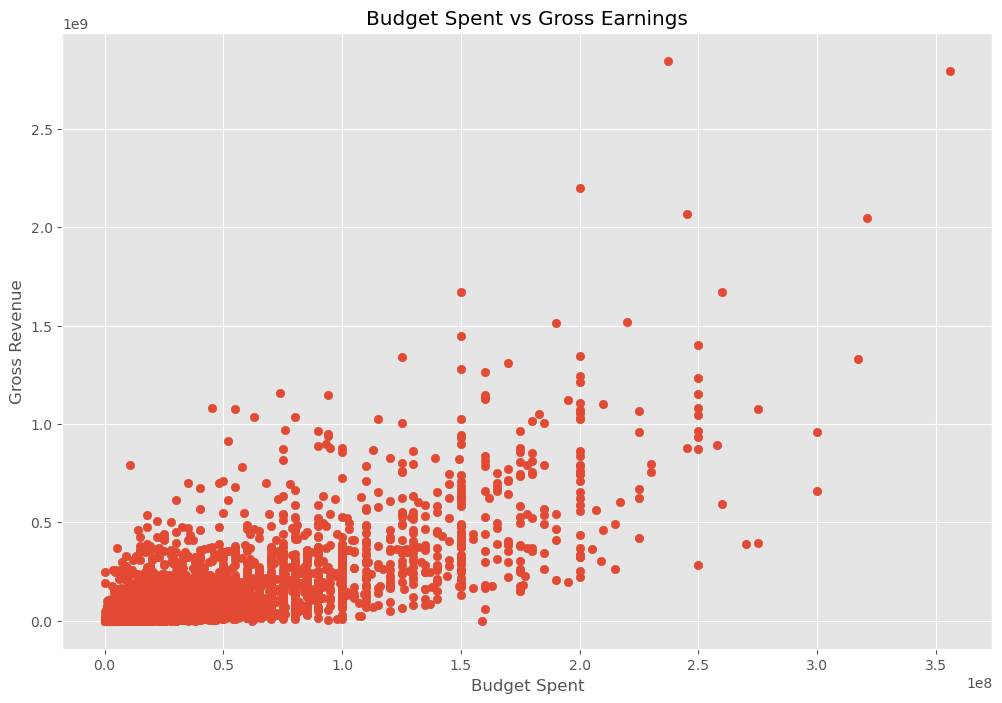

In [23]:
## Scatter Plot Budget vs Gross

plt.scatter(x = df_clean['budget'], y = df_clean['gross'])

plt.title('Budget Spent vs Gross Earnings')
plt.xlabel('Budget Spent')
plt.ylabel('Gross Revenue')

plt.show()

## Click to the left output frame to view the whole data 

In [44]:
# The whole data - Sorted by 'gross' in descending order

## To view the data by gross uncomment the code below

## with pd.option_context('display.max_rows', None, 'display.max_columns', None):
##    display(df_clean.sort_values(by='gross', ascending=False))  

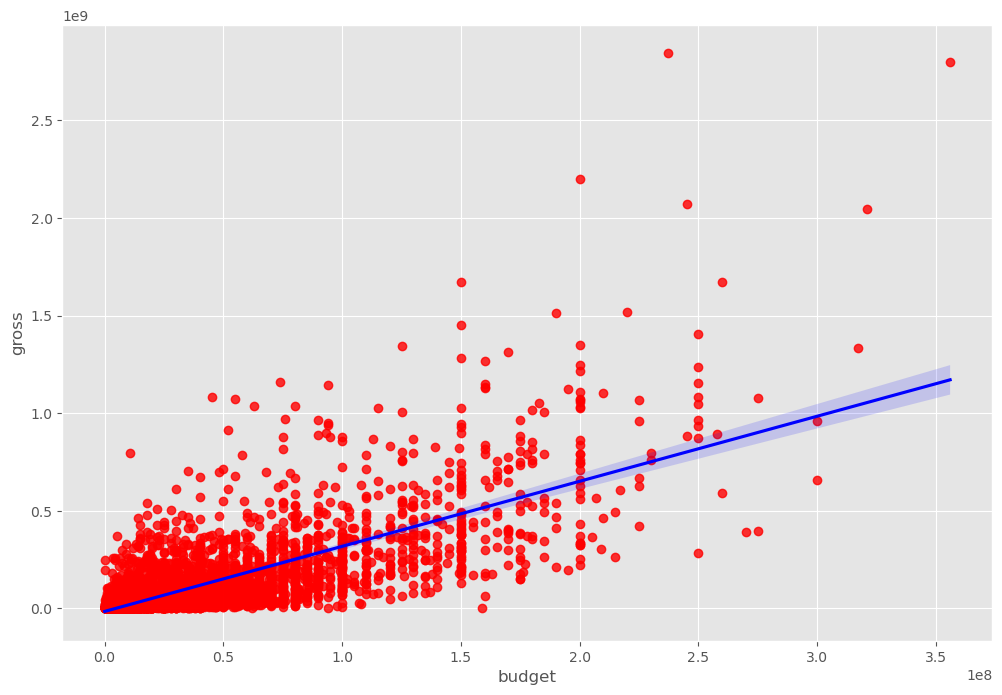

In [25]:
## Let's do a regression Plot

sns.regplot(x = 'budget', y = 'gross', data = df_clean, scatter_kws= {'color':'red'}, line_kws={'color':'blue'})

plt.plot()
plt.show()

In [26]:
## lets change year corrected column to numeric
df_clean['year_corrected'] = df_clean['year_corrected'].astype('Int64')

In [27]:
## Correlation between numeric variables

df_clean.corr(method = 'pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime,year_corrected
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_corrected,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


- There is High Correlation between Budget and Gross

In [28]:
correlation_matrix = df_clean.corr(method = 'pearson', numeric_only = True)

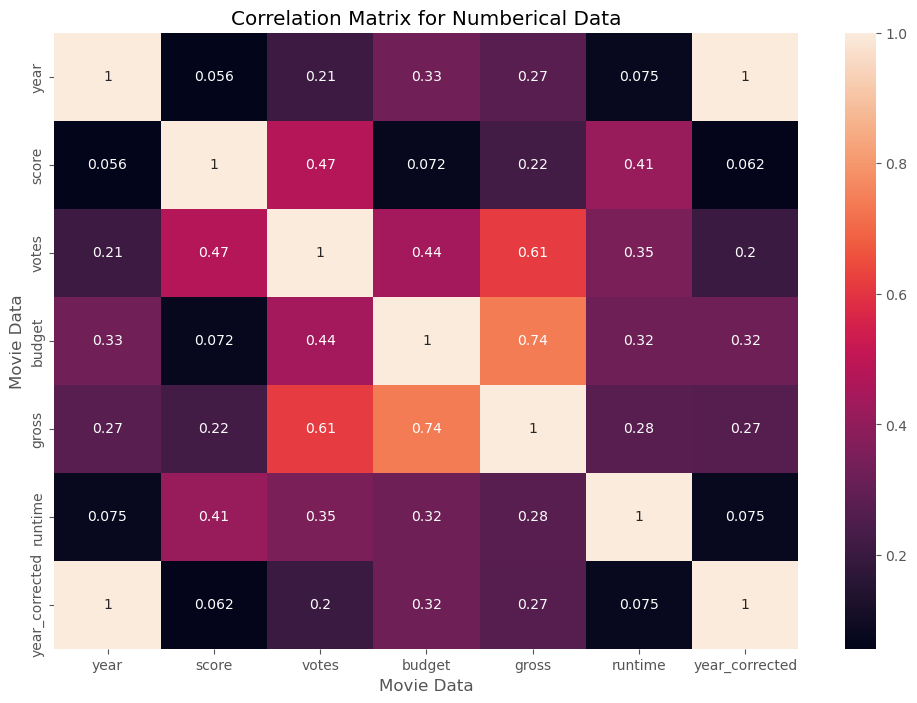

In [29]:
## Lets create a sns heatmap to visualize the correlations with ease

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numberical Data')
plt.xlabel('Movie Data')
plt.ylabel('Movie Data')

plt.show()

##### Lets check the correlation for data types other than numeric

In [30]:
df_clean.shape

(5421, 16)

In [31]:
df_clean.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'year_corrected'],
      dtype='object')

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5421 non-null   object 
 1   rating          5421 non-null   object 
 2   genre           5421 non-null   object 
 3   year            5421 non-null   int64  
 4   released        5421 non-null   object 
 5   score           5421 non-null   float64
 6   votes           5421 non-null   float64
 7   director        5421 non-null   object 
 8   writer          5421 non-null   object 
 9   star            5421 non-null   object 
 10  country         5421 non-null   object 
 11  budget          5421 non-null   Int64  
 12  gross           5421 non-null   Int64  
 13  company         5421 non-null   object 
 14  runtime         5421 non-null   float64
 15  year_corrected  5421 non-null   Int64  
dtypes: Int64(3), float64(3), int64(1), object(9)
memory usage: 735.9+ KB


##### we are convert strings and objects into numbers so that we can check their correlation

- Run a loop to find columns with object data type
- Convert them to category
- Assign cat.codes to them

##### We are going the map the new numeric data as well, so that we can refer to what the column means in the future

- Create a dictionary to store
- Store the category mapping (category: code) for each column
- Display the mappings

In [45]:
df_numerized = df_clean.copy()

# Dictionary to store mappings
category_mappings = {}


for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':  # Check if column is categorical
        # Convert column to 'category' type
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        
        # Store the category mapping (category: code) for each column
        category_mappings[col_name] = dict(enumerate(df_numerized[col_name].cat.categories))
        
        # Convert to categorical codes
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Display the mappings
for col_name, mapping in category_mappings.items():
    print(f"Column: {col_name}")
    
    for idx, value in list(mapping.items())[:5]:  
        # Displaying only first 5 mappings
        print(f"Code: {idx}, Category: {value}")
    print("\n")


Column: name
Code: 0, Category: *batteries not included
Code: 1, Category: 10 Cloverfield Lane
Code: 2, Category: 10 Things I Hate About You
Code: 3, Category: 10 to Midnight
Code: 4, Category: 10,000 BC


Column: rating
Code: 0, Category: Approved
Code: 1, Category: G
Code: 2, Category: NC-17
Code: 3, Category: Not Rated
Code: 4, Category: PG


Column: genre
Code: 0, Category: Action
Code: 1, Category: Adventure
Code: 2, Category: Animation
Code: 3, Category: Biography
Code: 4, Category: Comedy


Column: released
Code: 0, Category: 1982 (Japan)
Code: 1, Category: 1985 (United States)
Code: 2, Category: 1987 (United States)
Code: 3, Category: 1995 (Iran)
Code: 4, Category: 2019 (United States)


Column: director
Code: 0, Category: Aaron Blaise
Code: 1, Category: Aaron Norris
Code: 2, Category: Aaron Seltzer
Code: 3, Category: Aaron Sorkin
Code: 4, Category: Abby Kohn


Column: writer
Code: 0, Category: 'Weird Al' Yankovic
Code: 1, Category: A L Katz
Code: 2, Category: A.A. Milne
Code: 

In [34]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [35]:
df_numerized.shape

(5421, 16)

In [36]:
df_clean.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


##### Display the correlation between all the columns now

In [37]:
all_correlation_matrix = df_numerized.corr(method = 'pearson', numeric_only= True)

In [38]:
all_correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


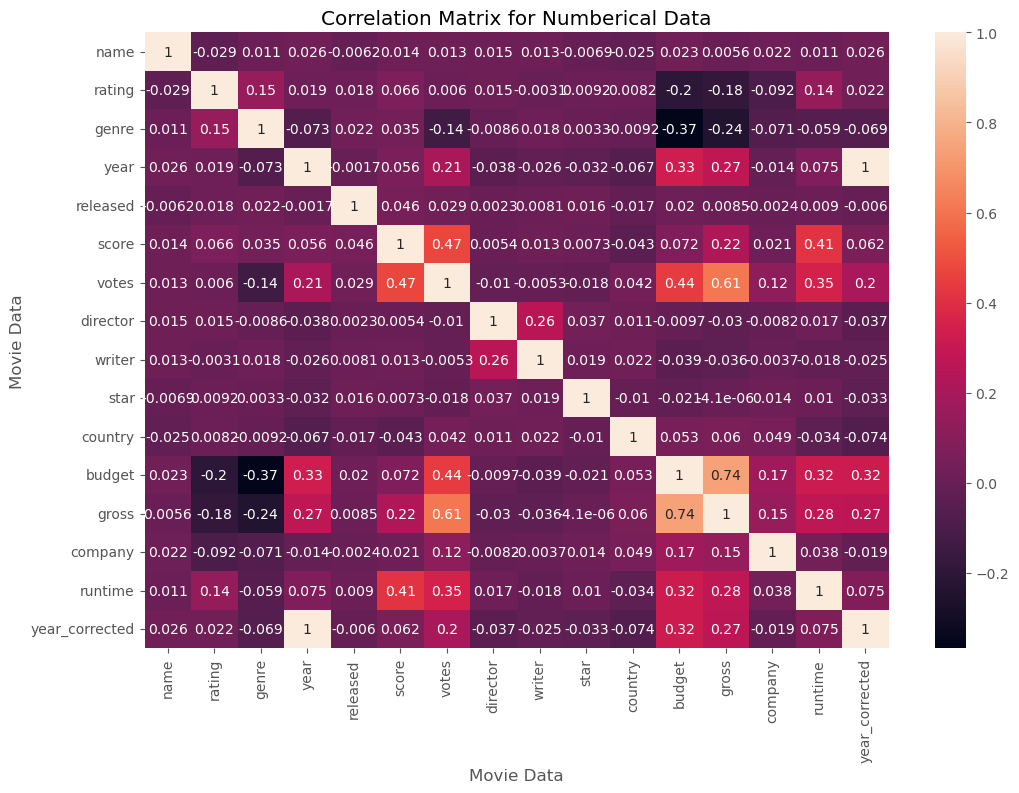

In [39]:
sns.heatmap(all_correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numberical Data')
plt.xlabel('Movie Data')
plt.ylabel('Movie Data')

plt.show()

In [40]:
# Use option_context to temporarily modify display settings
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    correlation_matrix = df_numerized.corr()
    corr_pairs = correlation_matrix.unstack()
    display(corr_pairs)

name            name              1.000000
                rating           -0.029234
                genre             0.010996
                year              0.025542
                released         -0.006152
                score             0.014450
                votes             0.012615
                director          0.015246
                writer            0.012880
                star             -0.006882
                country          -0.025490
                budget            0.023392
                gross             0.005639
                company           0.021697
                runtime           0.010850
                year_corrected    0.025542
rating          name             -0.029234
                rating            1.000000
                genre             0.147796
                year              0.019499
                released          0.018083
                score             0.065983
                votes             0.006031
           

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    sort_pairs = corr_pairs.sort_values(ascending=False)
    print(sort_pairs)

name            name              1.000000
rating          rating            1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
year_corrected  year_corrected    1.000000
                year              0.998726
year            year_corrected    0.998726
budget          gross             0.740247
gross           budget            0.740247
                votes             0.614751
votes           gross             0.614751
score           votes             0.474256
votes      

In [42]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # Filter pairs with correlation greater than 0.5
    high_corr = corr_pairs[corr_pairs > 0.5]
    high_corr_sorted = high_corr.sort_values(ascending=False)
    print(high_corr_sorted)

name            name              1.000000
director        director          1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
rating          rating            1.000000
writer          writer            1.000000
star            star              1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
year_corrected  year_corrected    1.000000
year            year_corrected    0.998726
year_corrected  year              0.998726
budget          gross             0.740247
gross           budget            0.740247
votes           gross             0.614751
gross           votes             0.614751
dtype: float64


### Conclusion

- *Budget* and *Gross* have high correlation of (0.74) (Pearson Method) 
- *Votes* have high correlation with *Gross* Revenue (0.61) (Pearson Method)